<a href="https://colab.research.google.com/github/RahulI5/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Individual_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Capstone Project/'
df = pd.read_csv( path + 'Hotel Bookings.csv')

In [4]:
# Shape of the dataframe
df.shape

(119390, 32)

In [5]:
# Checking for datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# Overall descriptive summary of the dataframe.
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
# Here we get all the columns name in the dataframe.
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
# Top five heading of the dataframe i.e 5 rows & 32 columns.
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
# Checking Country names columns
df['country']

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [10]:
# Here we are checking for null values
df.isna().sum().sort_values(ascending=False)[:5]                                     

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
dtype: int64

In [11]:
df['company'].fillna(0,inplace=True)
df['agent'].fillna(0,inplace=True)
df['country'].fillna(0,inplace=True)
df['children'].fillna(0,inplace=True)

In [12]:
# We have manipulate the data to remove the missing values.
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [13]:
# Name of countries present in our data
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 0, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH

In [14]:
# Number of countries which have major visitors.
country = df['country'].value_counts()[:10]
print(country)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64


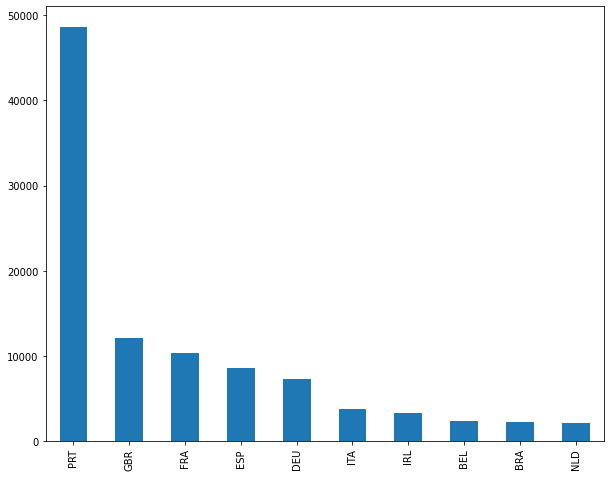

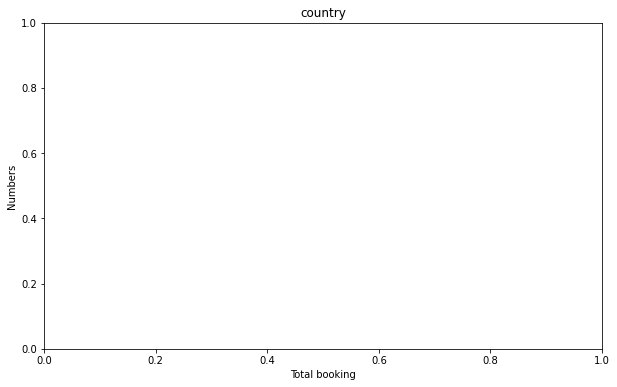

In [57]:
# Top five countries visitors are from Portugal(PRT-48590), Great Britain(GBR,12129), France(FRA, 10415) and Spain(ESP, 8568)
df["country"].value_counts()[:10].plot(kind='bar')
plt.figure(figsize=(10,6))
plt.xlabel("Total booking")
plt.ylabel("Numbers")
plt.title("country")
plt.show()

In [16]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [17]:
# No. of guests arriving yearly.
yearly_arrival_of_guests = df.groupby(['arrival_date_year','hotel'])['hotel'].count().unstack()
print(yearly_arrival_of_guests)

hotel              City Hotel  Resort Hotel
arrival_date_year                          
2015                    13682          8314
2016                    38140         18567
2017                    27508         13179


Text(0, 0.5, 'Years')

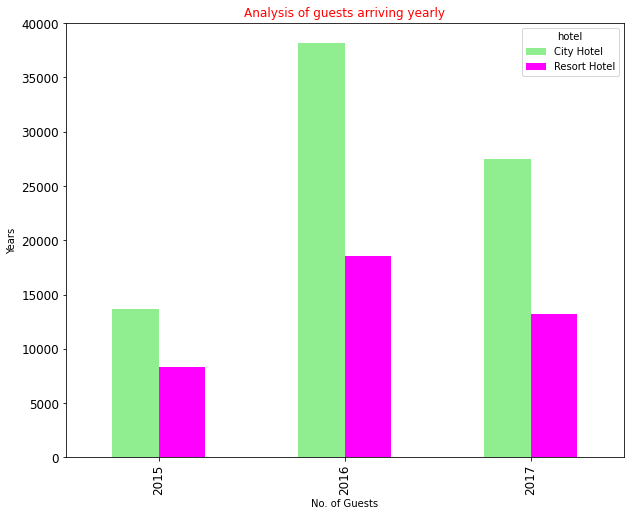

In [18]:
yearly_arrival_of_guests.plot(kind='bar',color = ['lightgreen','magenta'],figsize=(10,8),fontsize = 12)
plt.title('Analysis of guests arriving yearly', color = 'red')
plt.xlabel('No. of Guests')
plt.ylabel('Years')

In [19]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [20]:
monthly_stays = df['arrival_date_month'].value_counts()
print(monthly_stays)

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64


Text(0, 0.5, 'Number')

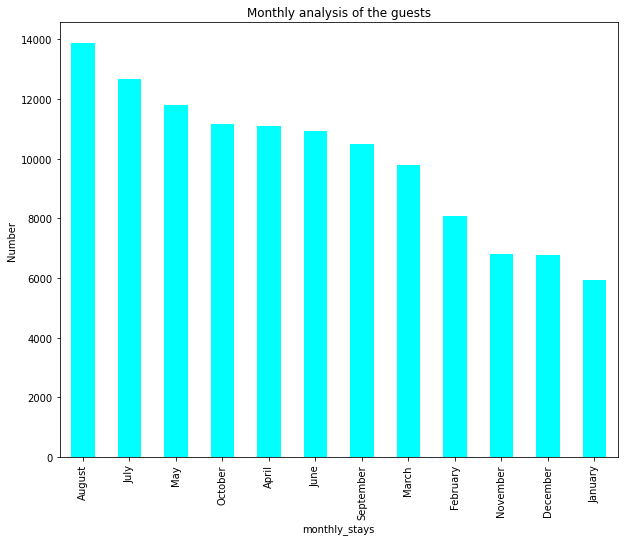

In [21]:
# Number of guests arriving monthly.
# August is on peak where no of guests arrived is 13877.
monthly_stays.plot(kind='bar',color='cyan',figsize=(10,8))
plt.title('Monthly analysis of the guests')
plt.xlabel('monthly_stays')
plt.ylabel('Number')

In [22]:
df['stays_in_weekend_nights'].value_counts()

0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

In [23]:
weekend_night_stays = df['stays_in_weekend_nights'].value_counts()[:5]
print(weekend_night_stays)

0    51998
2    33308
1    30626
4     1855
3     1259
Name: stays_in_weekend_nights, dtype: int64


Text(0, 0.5, 'Number')

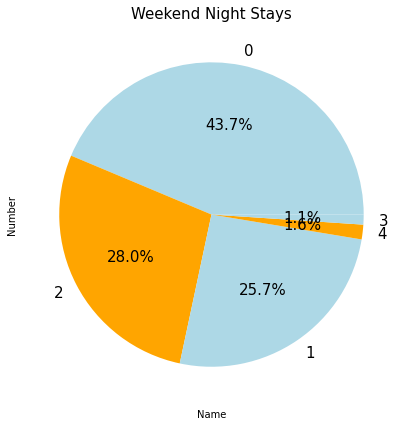

In [61]:
weekend_night_stays.plot(kind='pie',colors=['lightblue','orange'],autopct = '%1.1f%%',figsize=(7,7),fontsize=15)
plt.title('Weekend Night Stays',fontsize= 15)
plt.xlabel('Name')
plt.ylabel('Number')

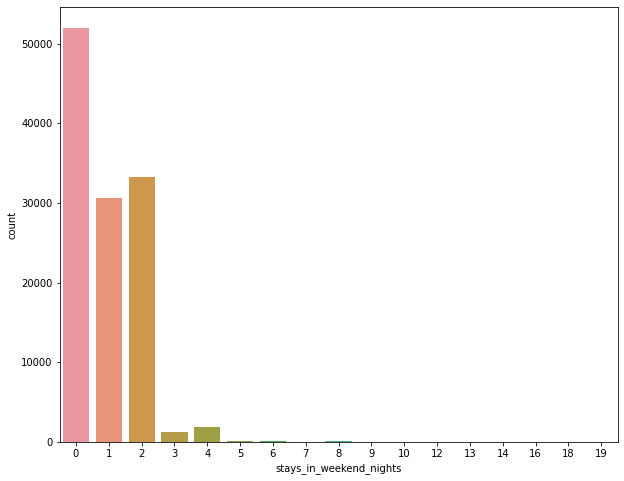

<Figure size 1440x1008 with 0 Axes>

In [51]:
# Bar graph of the guests who stays on weekends nights in the hotel.
sns.countplot(x = 'stays_in_weekend_nights',data=df)
plt.figure(figsize=(20,14))
plt.show()

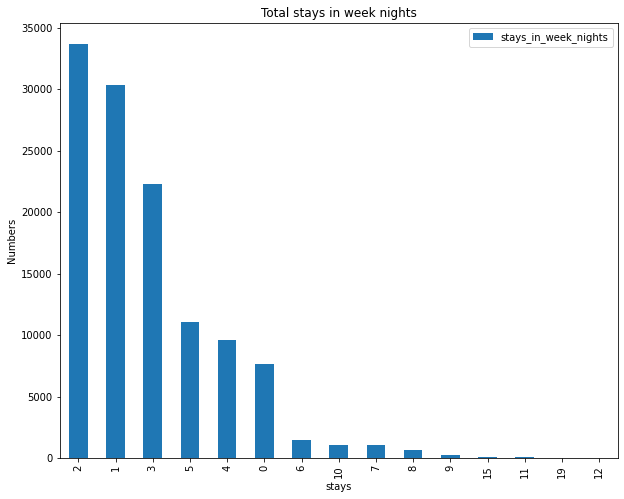

In [52]:
# No. of people who stays in week nights.
df['stays_in_week_nights'].value_counts()[:15].plot(kind='bar')
plt.title('Total stays in week nights')
plt.legend()
plt.xlabel('stays')
plt.ylabel('Numbers')
plt.show()

In [27]:
# Comparison between the hotels
hotel_type = df['hotel'].value_counts()
print(hotel_type)

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64


Text(0, 0.5, 'Number')

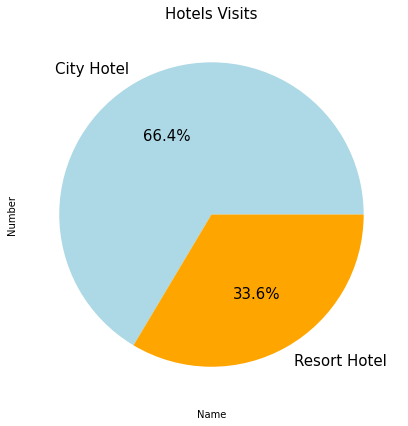

In [28]:
# Percentage share of hotel visits by the guest
hotel_type.plot(kind='pie',colors=['lightblue','orange'],autopct = '%1.1f%%',figsize=(7,7),fontsize=15)
plt.title('Hotels Visits',fontsize= 15)
plt.xlabel('Name')
plt.ylabel('Number')

In [29]:
# The visitors mostly prefer to go in City Hotel as compared to Resort Hotel as shown in the Pie Chart.

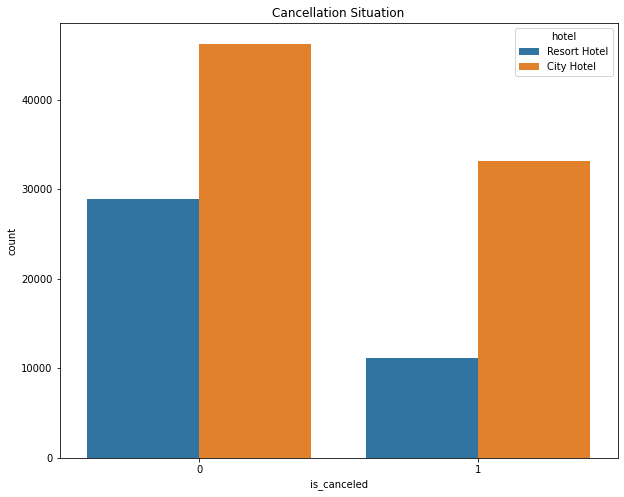

In [30]:
# Cancellation Analysis between both the hotels.
plt.figure(figsize=(10,8))
sns.countplot(x='is_canceled', hue = 'hotel', data= df)
plt.title('Cancellation Situation')
plt.show()

In [31]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [32]:
food = df['meal'].value_counts()
food

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

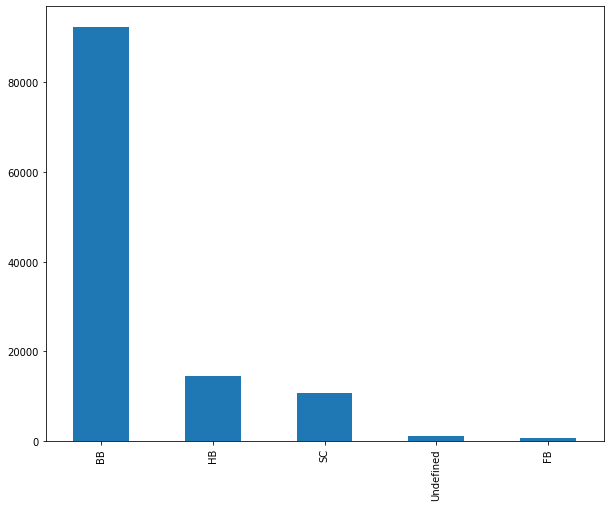

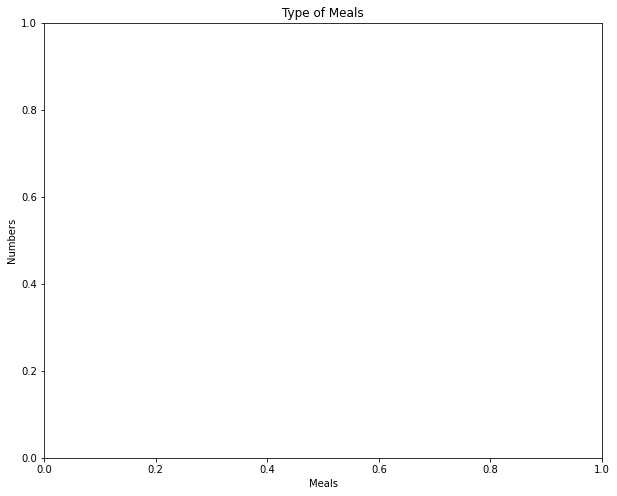

In [54]:
# Preference of the meals
food.plot(kind='bar')
plt.figure(figsize=(10,8))
plt.title('Type of Meals')
plt.xlabel('Meals')
plt.ylabel('Numbers')
plt.show()

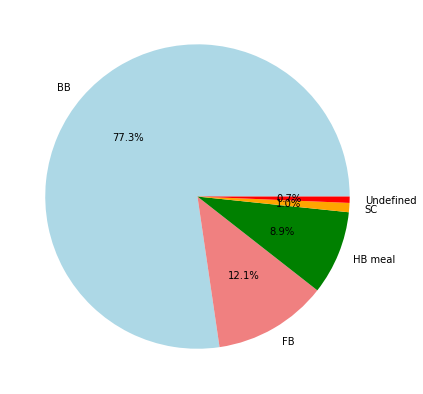

In [34]:
# Here we are checking the share of meal which we are providing to the
meals = ['BB','FB','HB meal','SC','Undefined']
data=df['meal'].value_counts()
colors = ['lightblue','lightcoral','green','orange','red']


fig = plt.figure(figsize =(10, 7))
plt.pie(data,labels=meals,autopct='%1.1f%%',colors=colors,)
plt.show()

In [ ]:
# The Bed & Breakfast (BB) option most preferred with the share of 77.3%.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


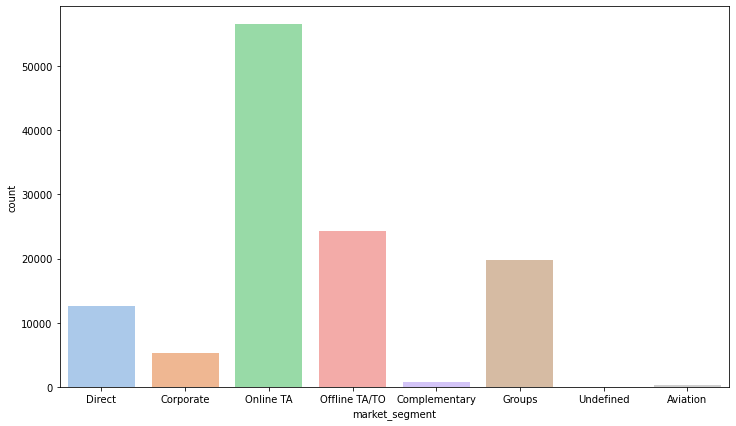

In [68]:
# Bar view of market segment of the hotel
plt.figure(figsize=(12,7))
sns.countplot(df['market_segment'], palette='pastel')
plt.show()

In [36]:
df['required_car_parking_spaces'].unique()

array([0, 1, 2, 8, 3])

In [37]:
df['required_car_parking_spaces'].value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [38]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [39]:
bookings = df[['previous_bookings_not_canceled','booking_changes']].value_counts()[:10]
bookings

previous_bookings_not_canceled  booking_changes
0                               0                  98471
                                1                  12135
                                2                   3664
1                               0                   1201
0                               3                    883
2                               0                    452
0                               4                    358
3                               0                    259
1                               1                    244
4                               0                    186
dtype: int64

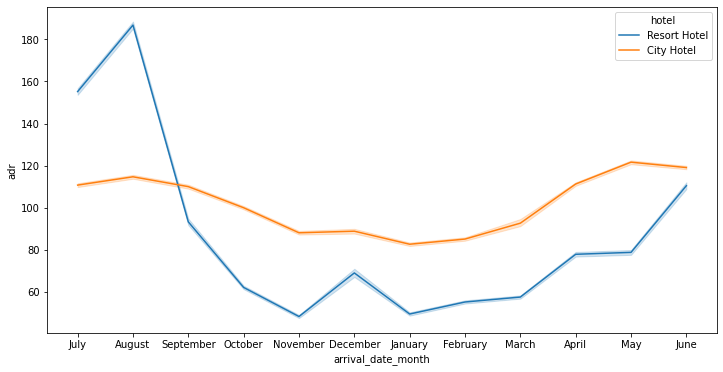

In [69]:
# Hotel prices vaires from July as seen in the below line chart.
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df)
plt.show()

In [41]:
avg_adr = df['adr'].value_counts()[:10]

In [42]:
df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

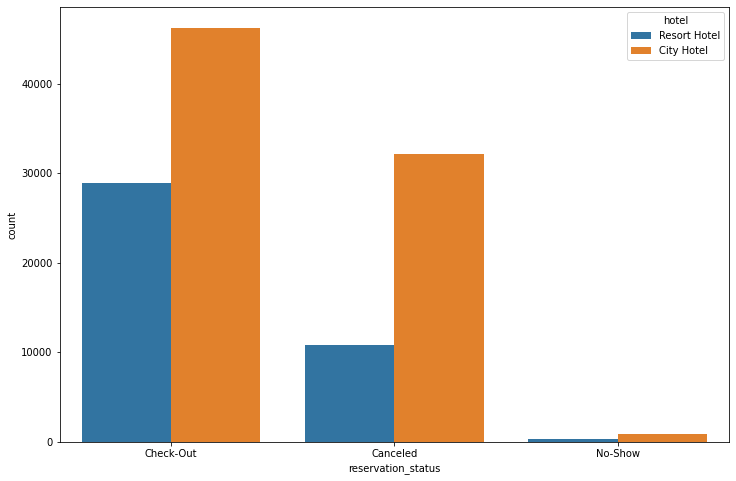

In [55]:
plt.figure(figsize=(12,8))
sns.countplot(x='reservation_status',hue='hotel',data = df)

In [44]:
df['reservation_status_date'].value_counts()[:15]

2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
2015-07-02     469
2016-12-07     450
2015-12-18     423
2016-02-09     412
2016-04-04     382
2017-01-24     343
2016-11-21     340
2016-03-15     329
2017-01-19     321
2017-02-02     315
Name: reservation_status_date, dtype: int64

In [45]:
room = df[['reserved_room_type','assigned_room_type']].value_counts()[:10]
room

reserved_room_type  assigned_room_type
A                   A                     73598
D                   D                     17736
A                   D                      7548
E                   E                      5923
F                   F                      2707
G                   G                      2041
A                   C                      1447
                    E                      1156
                    B                      1123
B                   B                       988
dtype: int64

In [46]:
room_type = df.groupby(['reserved_room_type','assigned_room_type'])['hotel'].count().unstack()
room_type

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,P
reserved_room_type,,,,,,,,,,,,
A,73598.0,1123.0,1447.0,7548.0,1156.0,417.0,186.0,94.0,215.0,210.0,NaN,NaN
B,111.0,988.0,NaN,5.0,2.0,2.0,8.0,NaN,NaN,2.0,NaN,NaN
C,5.0,2.0,883.0,6.0,4.0,2.0,10.0,10.0,10.0,NaN,NaN,NaN
D,312.0,27.0,34.0,17736.0,686.0,204.0,82.0,9.0,67.0,44.0,NaN,NaN
E,15.0,3.0,8.0,22.0,5923.0,404.0,100.0,4.0,40.0,16.0,NaN,NaN
F,6.0,17.0,NaN,4.0,31.0,2707.0,116.0,3.0,10.0,3.0,NaN,NaN
G,5.0,2.0,2.0,NaN,4.0,14.0,2041.0,7.0,15.0,4.0,NaN,NaN
H,NaN,NaN,NaN,1.0,NaN,NaN,10.0,584.0,6.0,NaN,NaN,NaN
L,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN


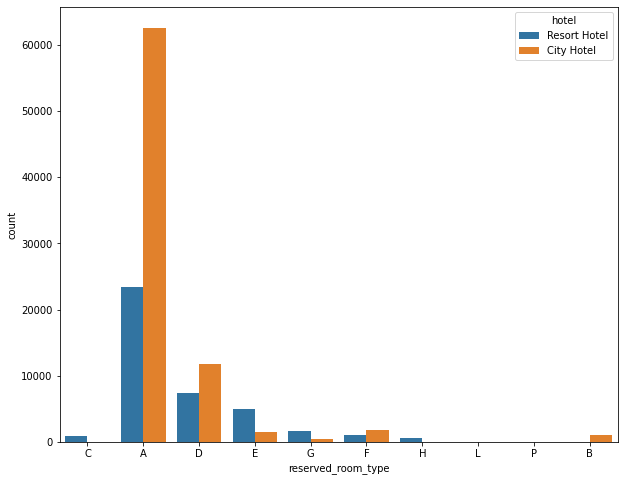

In [56]:
sns.countplot(x='reserved_room_type',hue='hotel',data = df)

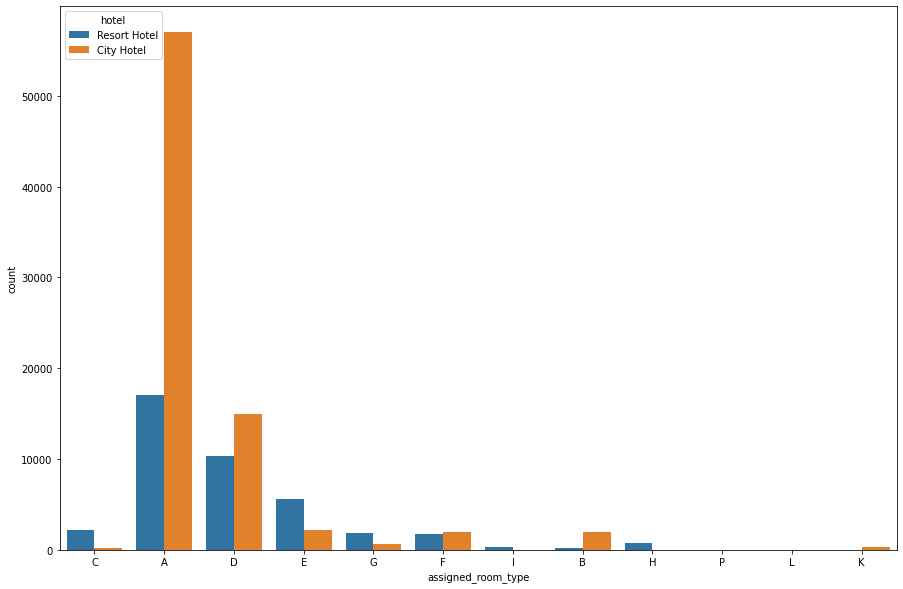

In [48]:
plt.figure(figsize=(15,10))
sns.countplot(x='assigned_room_type',hue='hotel',data = df)

0    115580
1      3810
Name: is_repeated_guest, dtype: int64


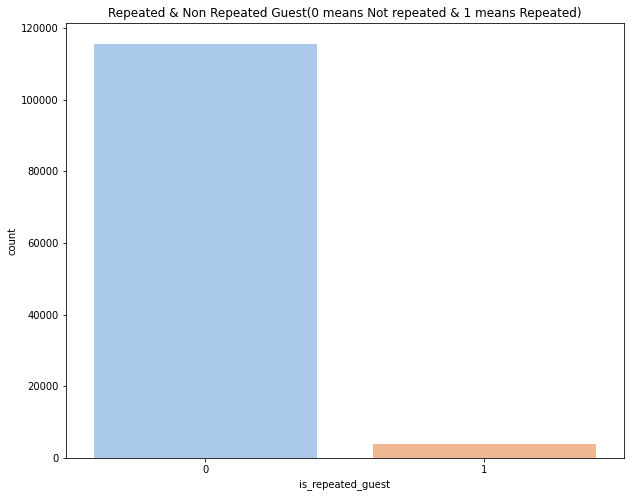

In [49]:
# Analysis of repeated guest
print(df['is_repeated_guest'].value_counts())
plt.rcParams["figure.figsize"]= (10,8)
sns.countplot(data= df, x = 'is_repeated_guest',palette='pastel')
plt.title('''Repeated & Non Repeated Guest(0 means Not repeated & 1 means Repeated)''',fontsize=12)
plt.show()

In [50]:
# Conclusion
# 1. The August month is the peak month.
# 2. Most preferred hotels 